## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Load Dataset

In [2]:
file_path = "../Datasets/Clean_dataset/Intensip Case Study 1.csv"  
df = pd.read_csv(file_path, encoding="latin1")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (500, 16)


,Week,Address,Number of delivered orders,Basket size,Bad rated orders due to wrong or Missing Products,Bad rated orders due to store packaging Issues,Bad rated orders due to store allergy not considered,Bad rated orders due to to Poor Quality,Cancelled Orders Due to Customer Absent,Cancelled Orders due to Partner Printer/internet issue,Cancelled Orders Due to Partner Products Not Available,Cancelled Orders Due to Partner Store Closed,Cancelled Orders Due to Store Cant Deliver,Refunds to customer,Total Order Complaint,Total Order Cancellation
0,04-Jan-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",104, 21.65,1,0,0,1,0,0,0,0,0, 3.25,2,0
1,01-Feb-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",124, 20.95,1,0,0,0,0,0,0,0,0, 3.14,1,0
2,08-Feb-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",71, 22.94,1,0,0,0,0,0,0,0,0, 11.47,1,0
3,15-Feb-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",76, 21.11,1,0,0,0,0,0,0,0,0, 3.17,1,0
4,08-Mar-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",87, 22.43,1,0,0,1,0,0,0,0,0, 6.73,2,0


## Correct Cleaning Code

In [3]:
cols_to_clean = ["Basket size", "Refunds to customer"]

for col in cols_to_clean:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("", "", regex=False)   # remove corrupted euro symbol
        .str.replace("€", "", regex=False)   # just in case
        .str.strip()
    )

    df[col] = pd.to_numeric(df[col], errors="coerce")

## Select Numeric Data

In [4]:
numeric_df = df.select_dtypes(include=np.number)

print("Numeric Columns:")
print(numeric_df.columns)

numeric_df.head()

Numeric Columns:
Index(['Number of delivered orders', 'Basket size',
       'Bad rated orders due to wrong or Missing Products',
       'Bad rated orders due to store packaging Issues',
       'Bad rated orders due to store allergy not considered',
       'Bad rated orders due to to  Poor Quality',
       'Cancelled Orders Due to Customer Absent',
       'Cancelled Orders due to Partner Printer/internet issue',
       'Cancelled Orders Due to Partner Products Not Available',
       'Cancelled Orders Due to Partner Store Closed',
       'Cancelled Orders Due to Store Cant Deliver', 'Refunds to customer',
       'Total Order Complaint', 'Total Order Cancellation'],
      dtype='object')


,Number of delivered orders,Basket size,Bad rated orders due to wrong or Missing Products,Bad rated orders due to store packaging Issues,Bad rated orders due to store allergy not considered,Bad rated orders due to to Poor Quality,Cancelled Orders Due to Customer Absent,Cancelled Orders due to Partner Printer/internet issue,Cancelled Orders Due to Partner Products Not Available,Cancelled Orders Due to Partner Store Closed,Cancelled Orders Due to Store Cant Deliver,Refunds to customer,Total Order Complaint,Total Order Cancellation
0,104,21.65,1,0,0,1,0,0,0,0,0,3.25,2,0
1,124,20.95,1,0,0,0,0,0,0,0,0,3.14,1,0
2,71,22.94,1,0,0,0,0,0,0,0,0,11.47,1,0
3,76,21.11,1,0,0,0,0,0,0,0,0,3.17,1,0
4,87,22.43,1,0,0,1,0,0,0,0,0,6.73,2,0


## Define Features & Target

In [5]:
# We’ll predict Total Order Complaint

X = numeric_df.drop(columns=["Total Order Complaint"])
y = numeric_df["Total Order Complaint"]

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

print("Final Feature Shape:", X.shape)

Final Feature Shape: (500, 13)


## Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (400, 13)
Test size: (100, 13)


## Build Random Forest Model

In [7]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

## Evaluate Model

In [8]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.9706228783745418
MSE: 0.2379869999999999
RMSE: 0.48783911282306985


## Feature Importance

In [9]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

print("Top Features:")
print(importance.head(10))

Top Features:
Bad rated orders due to wrong or Missing Products         0.931277
Bad rated orders due to to  Poor Quality                  0.027988
Refunds to customer                                       0.021898
Basket size                                               0.004880
Bad rated orders due to store packaging Issues            0.004050
Bad rated orders due to store allergy not considered      0.004003
Number of delivered orders                                0.003723
Total Order Cancellation                                  0.001128
Cancelled Orders Due to Customer Absent                   0.000358
Cancelled Orders due to Partner Printer/internet issue    0.000335
dtype: float64


## Plot Feature Importance

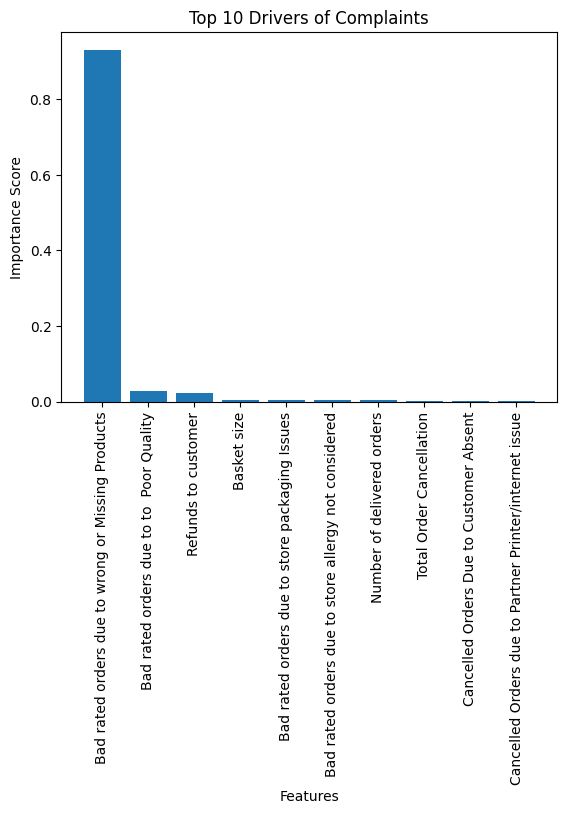

In [10]:
plt.figure()
plt.bar(importance.index[:10], importance.values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Drivers of Complaints")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

## Actual vs Predicted Plot

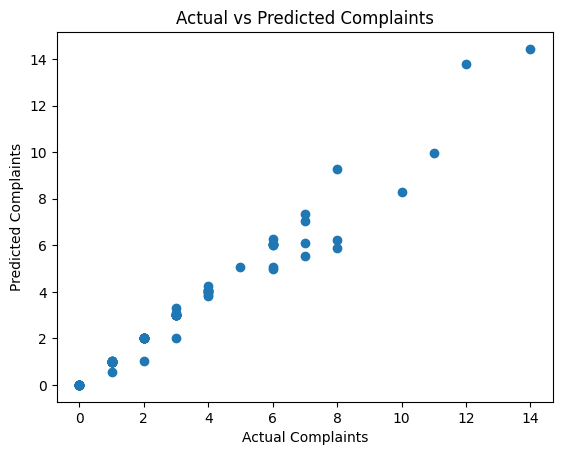

In [11]:
plt.figure()
plt.scatter(y_test, predictions)
plt.title("Actual vs Predicted Complaints")
plt.xlabel("Actual Complaints")
plt.ylabel("Predicted Complaints")
plt.show()